In [ ]:
import pandas as pd

In [ ]:
dataset_location = '' #Change to where you saved the restricted dataset
FOUNTA = pd.read_csv(dataset_location + 'hatespeech_text_label_vote_RESTRICTED_100K.csv', sep='     ', header=None, names=['Tweet Text', 'Label', 'Votes'], skiprows=1)
FOUNTA['Label'] = FOUNTA['Tweet Text'].map(lambda txt: txt.split()[-2])
FOUNTA['Votes'] = FOUNTA['Tweet Text'].map(lambda txt: txt.split()[-1])
FOUNTA['Tweet Text'] = FOUNTA['Tweet Text'].map(lambda txt: ' '.join(txt.split()[:-2]))

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
FOUNTA.head()

,Tweet Text,Label,Votes
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam,4
1,RT @Papapishu: Man it would fucking rule if we...,abusive,4
2,It is time to draw close to Him &#128591;&#127...,normal,4
3,if you notice me start to act different or dis...,normal,5
4,"Forget unfollowers, I believe in growing. 7 ne...",normal,3


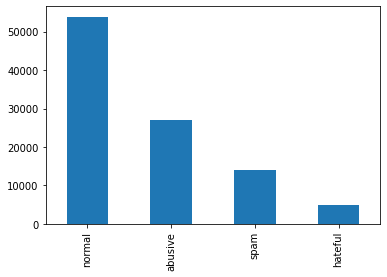

In [ ]:
FOUNTA.Label.value_counts().plot(kind='bar')

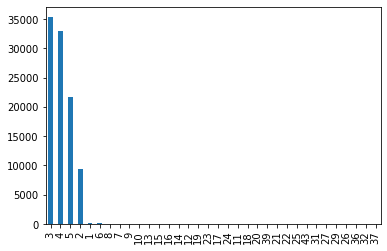

In [ ]:
FOUNTA.Votes.value_counts().plot(kind='bar')

In [ ]:
import re
import string
from html import unescape

In [ ]:
FOUNTA['Cleaned'] = FOUNTA['Tweet Text'].apply(lambda x: x.lower())
FOUNTA['Cleaned'] = FOUNTA['Cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))
FOUNTA['Cleaned'] = FOUNTA['Cleaned'].apply(lambda x: unescape(x))
FOUNTA['Cleaned'] = FOUNTA['Cleaned'].apply(lambda x: re.sub(r'(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+', '', x))
FOUNTA['Cleaned'] = FOUNTA['Cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
FOUNTA['Cleaned'] = FOUNTA['Cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
print('\n'.join(FOUNTA['Cleaned'].head().values))

beats by dr dre urbeats wired inear headphones white 
rt man it would fucking rule if we had a party that was against perpetual warfare
it is time to draw close to him father i draw near to you now and always 
if you notice me start to act different or distant its bc i peeped something you did or i notice a difference in how you act ian fw it
forget unfollowers i believe in growing new followers in the last day stats via 


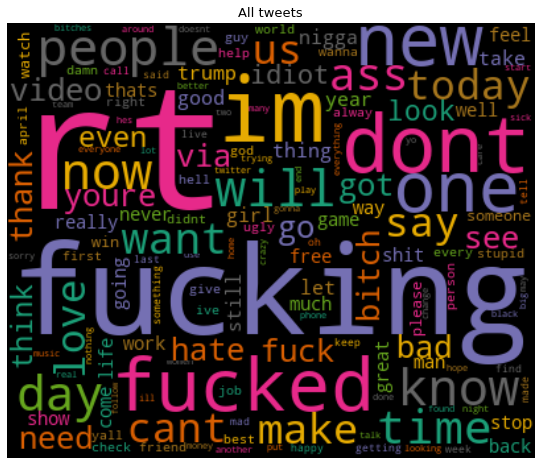

In [ ]:
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt

# Function for generating word clouds
wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2", collocations=False).generate(' '.join(FOUNTA['Cleaned'].values))
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('\n'.join(wrap("All tweets",60)),fontsize=13)
plt.show()

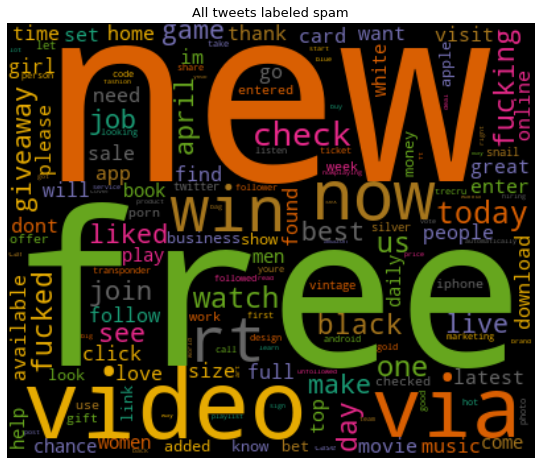

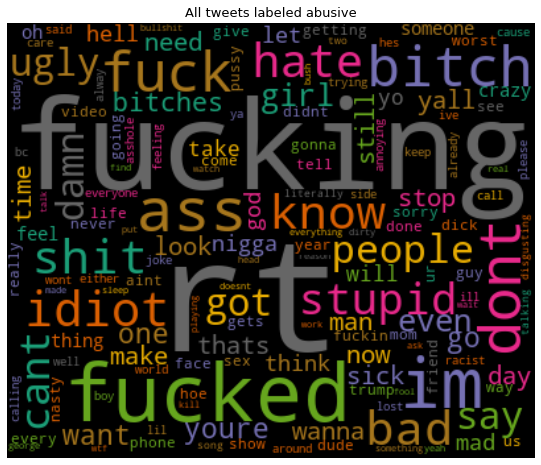

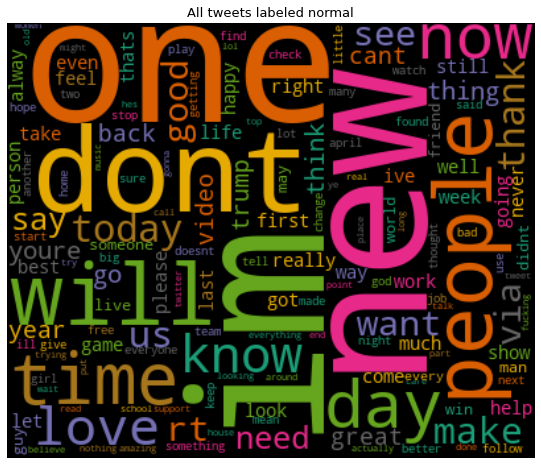

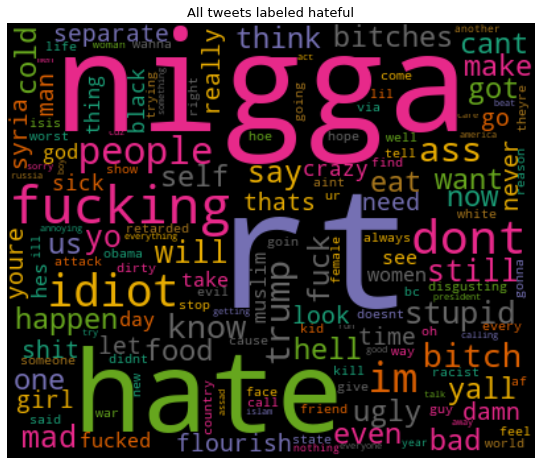

In [ ]:
label_types = FOUNTA.Label.unique()
for label in label_types:
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2", collocations=False).generate(' '.join(FOUNTA.query(f"Label == '{label}'")['Cleaned'].values))
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(f"All tweets labeled {label}",60)),fontsize=13)
  plt.show()

In [ ]:
from collections import Counter
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
common_words = []
for label in label_types:
  all = ' '.join(FOUNTA.query(f"Label == '{label}'")['Cleaned'].values).split()
  count = Counter([x for x in all if x not in nltk.corpus.stopwords.words('english')])
  print(count.most_common(20))
  common_words.append(count.most_common(20))

[('new', 1083), ('free', 903), ('get', 784), ('video', 731), ('via', 669), ('win', 520), ('rt', 520), ('check', 478), ('today', 377), ('one', 368), ('watch', 368), ('fucking', 335), ('us', 323), ('black', 315), ('fucked', 312), ('join', 288), ('see', 280), ('best', 278), ('giveaway', 264), ('day', 257)]
[('rt', 13604), ('fucking', 13275), ('fucked', 3912), ('im', 3003), ('like', 2537), ('ass', 2268), ('dont', 1963), ('bitch', 1801), ('fuck', 1725), ('u', 1411), ('get', 1381), ('bad', 1205), ('know', 1167), ('shit', 1166), ('hate', 1105), ('stupid', 985), ('cant', 953), ('people', 924), ('got', 863), ('idiot', 858)]
[('im', 3105), ('like', 3039), ('one', 2645), ('dont', 2503), ('get', 2353), ('people', 2127), ('new', 1947), ('love', 1895), ('time', 1821), ('know', 1776), ('day', 1668), ('today', 1627), ('us', 1588), ('see', 1479), ('good', 1450), ('rt', 1443), ('via', 1428), ('would', 1396), ('want', 1304), ('youre', 1303)]
[('rt', 1856), ('hate', 743), ('fucking', 622), ('niggas', 614)

In [ ]:
for label, wl in zip(label_types, common_words):
  for item, num in wl:
    number_in_matching = FOUNTA.query(f"Label == '{label}'")['Cleaned'].apply(lambda x: (item in x) * 1).agg('mean')
    number_in_all = FOUNTA['Cleaned'].apply(lambda x: (item in x) * 1).agg('mean')
    print(f'Word {item} is {number_in_matching-number_in_all:.2f} more likely in {label} tweets')
  print()

Word new is 0.05 more likely in spam tweets
Word free is 0.04 more likely in spam tweets
Word get is 0.00 more likely in spam tweets
Word video is 0.03 more likely in spam tweets
Word via is 0.03 more likely in spam tweets
Word win is 0.02 more likely in spam tweets
Word rt is -0.10 more likely in spam tweets
Word check is 0.03 more likely in spam tweets
Word today is 0.00 more likely in spam tweets
Word one is -0.02 more likely in spam tweets
Word watch is 0.01 more likely in spam tweets
Word fucking is -0.12 more likely in spam tweets
Word us is -0.03 more likely in spam tweets
Word black is 0.02 more likely in spam tweets
Word fucked is -0.02 more likely in spam tweets
Word join is 0.01 more likely in spam tweets
Word see is -0.01 more likely in spam tweets
Word best is 0.01 more likely in spam tweets
Word giveaway is 0.01 more likely in spam tweets
Word day is 0.00 more likely in spam tweets

Word rt is 0.24 more likely in abusive tweets
Word fucking is 0.33 more likely in abusive 